In [1]:
#@!pip install --upgrade pip autogluon bokeh

Preparing data

In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
#warnings.filterwarnings("ignore")


df = pd.read_csv(
    "sqlite_report_performance.csv",
    skipinitialspace=True,
    index_col=[0]
)
# special train-test split into two equally shaped dataframes
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.85 # I create a boolean mask so my resulting dataframe is easily filterable,
# like this:
train = df[msk]
test = df[~msk]

# put into files for future use
train.to_csv('train.csv')
test.to_csv('test.csv')

# We can use the train_test_split function from sklearn.model_selection to divide the df into training and testing sets.
# We will use 85% of the data for training and 15% for testing.

# To split the dataframe into training and testing sets, we will use the train_test_split function from sklearn.model_selection library.

#train, test = train_test_split(df, test_size=0.2)
#y = df.pop('calculated_player_performance')
#X = df
#X = X.drop(columns=['f1', 'f2', 'f3', 'f4', 'f5', 'win'], axis=1)
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.15)

X = train
X = X.drop(columns=['f1', 'f2', 'f3', 'f4', 'f5', 'split'])

#print(len(X_train), len(X_test), len(y_train), len(y_test))


/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#train_data = X_train
train_data = TabularDataset(X)
# it’s also a Pandas DataFrame but with additional methods

In [4]:
train_data.tail(2)

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,match_identifier,duration,calculated_player_performance
503736,4.0,0.0,0.0,7916.0,11.0,117.0,Lulu,0.0,14.0,715.0,...,5.0,0.0,65.0,10.0,10.0,30.0,0.0,2.271366e+09,26.943400,23.94
503737,12.0,0.0,0.0,16268.0,16.0,58.0,Renekton,0.0,8.0,9323.0,...,3.0,0.0,27.0,4.0,4.0,12.0,1.0,2.271371e+09,29.481867,49.68


In [5]:
train_data.columns

Index(['assists', 'baronKills', 'bountyLevel', 'champExperience', 'champLevel',
       'championId', 'championName', 'championTransform',
       'consumablesPurchased', 'damageDealtToBuildings',
       ...
       'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame',
       'wardsKilled', 'wardsPlaced', 'win', 'match_identifier', 'duration',
       'calculated_player_performance'],
      dtype='object', length=107)

In [6]:
print(train_data.iloc[0])

assists                                   9.0
baronKills                                0.0
bountyLevel                               0.0
champExperience                       24496.0
champLevel                               18.0
                                     ...     
wardsPlaced                               5.0
win                                       1.0
match_identifier                 2317437376.0
duration                            37.686583
calculated_player_performance           48.55
Name: 0, Length: 107, dtype: object


In [7]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [8]:
'''
list_available_graphs = ['stacked_histogram', 'density', 'box_plot', 'scatter_patterns']

df1 = X.cumsum()
print('Calculated cumulative sum of df')
ax = df1.plot()
print('Got ax')

for x in range(len(list_available_graphs)):
    print('Creating multiple visualizations...')
    
    ax = df1.plot()
    if x == 'stacked_histogram':
        ax = X.plot.hist(bins=25, stacked=True) # for stacked histogram plot
    elif x == 'density':
        ax = X.plot.kde() # for a density plot
    elif x == 'box_plot':
        X.plot.box(vert=False) # for a box plot
    elif x == 'scatter_patterns':
        ax = X.plot.scatter(x='x', y='y') # for comparing scatter patterns between variables x and y


    # from here down – standard plot output
    ax.set_title('Visualization {}'.format(x))
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    fig = ax.figure
    fig.set_size_inches(8, 3)
    fig.tight_layout(pad=1)
    fig.savefig('filename_{}.png'.format(x), dpi=125)
    plt.close()

'''

"\nlist_available_graphs = ['stacked_histogram', 'density', 'box_plot', 'scatter_patterns']\n\ndf1 = X.cumsum()\nprint('Calculated cumulative sum of df')\nax = df1.plot()\nprint('Got ax')\n\nfor x in range(len(list_available_graphs)):\n    print('Creating multiple visualizations...')\n    \n    ax = df1.plot()\n    if x == 'stacked_histogram':\n        ax = X.plot.hist(bins=25, stacked=True) # for stacked histogram plot\n    elif x == 'density':\n        ax = X.plot.kde() # for a density plot\n    elif x == 'box_plot':\n        X.plot.box(vert=False) # for a box plot\n    elif x == 'scatter_patterns':\n        ax = X.plot.scatter(x='x', y='y') # for comparing scatter patterns between variables x and y\n\n\n    # from here down – standard plot output\n    ax.set_title('Visualization {}'.format(x))\n    ax.set_xlabel('X Axis')\n    ax.set_ylabel('Y Axis')\n    fig = ax.figure\n    fig.set_size_inches(8, 3)\n    fig.tight_layout(pad=1)\n    fig.savefig('filename_{}.png'.format(x), dpi=125

Training

In [9]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='calculated_player_performance',
                             verbosity=2,
                            problem_type='regression',
                            path='./player_performance_models',
                            ).fit(train_data, time_limit=60*60, presets='medium_quality') # https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality 

Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "./player_performance_models/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #2 SMP Mon Jan 23 18:37:26 PST 2023
Train Data Rows:    427984
Train Data Columns: 106
Label Column: calculated_player_performance
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    262636.9 MB
	Train Data (Original)  Memory Usage: 601.21 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 10 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Gen

[1000]	valid_set's rmse: 1.35855
[2000]	valid_set's rmse: 1.0874
[3000]	valid_set's rmse: 0.987166
[4000]	valid_set's rmse: 0.943964
[5000]	valid_set's rmse: 0.915449
[6000]	valid_set's rmse: 0.896873
[7000]	valid_set's rmse: 0.883831
[8000]	valid_set's rmse: 0.872796
[9000]	valid_set's rmse: 0.864917
[10000]	valid_set's rmse: 0.858145


	-0.8581	 = Validation score   (-root_mean_squared_error)
	189.15s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 3399.9s of the 3399.9s of remaining time.


[1000]	valid_set's rmse: 1.01215
[2000]	valid_set's rmse: 0.84315
[3000]	valid_set's rmse: 0.78212
[4000]	valid_set's rmse: 0.747896
[5000]	valid_set's rmse: 0.727388
[6000]	valid_set's rmse: 0.713493
[7000]	valid_set's rmse: 0.704493
[8000]	valid_set's rmse: 0.6974
[9000]	valid_set's rmse: 0.692012
[10000]	valid_set's rmse: 0.687336


	-0.6873	 = Validation score   (-root_mean_squared_error)
	211.58s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 3186.63s of the 3186.63s of remaining time.
	-2.5918	 = Validation score   (-root_mean_squared_error)
	163.5s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 3021.78s of the 3021.78s of remaining time.
	-0.5044	 = Validation score   (-root_mean_squared_error)
	1365.24s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1656.18s of the 1656.17s of remaining time.
	-2.6308	 = Validation score   (-root_mean_squared_error)
	97.31s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1557.56s of the 1557.56s of remaining time.
	-0.6226	 = Validation score   (-root_mean_squared_error)
	296.55s	 = Training   runtime
	0.05s	 = Validation runtime
Fitti

[1000]	valid_set's rmse: 1.00725
[2000]	valid_set's rmse: 0.930452
[3000]	valid_set's rmse: 0.908553
[4000]	valid_set's rmse: 0.899658
[5000]	valid_set's rmse: 0.894917
[6000]	valid_set's rmse: 0.892124
[7000]	valid_set's rmse: 0.889981
[8000]	valid_set's rmse: 0.888156
[9000]	valid_set's rmse: 0.886523
[10000]	valid_set's rmse: 0.88539


	-0.8854	 = Validation score   (-root_mean_squared_error)
	343.87s	 = Training   runtime
	0.62s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 560.39s of remaining time.
	-0.4147	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 3040.81s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("./player_performance_models/")


Monitoring

In [10]:
predictor.leaderboard()

                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.414677       0.527423  1873.706744                0.000444           0.327467            2       True         12
1              CatBoost  -0.504388       0.175320  1365.244249                0.175320        1365.244249            1       True          6
2       NeuralNetFastAI  -0.622621       0.048560   296.551680                0.048560         296.551680            1       True          8
3              LightGBM  -0.687336       0.303099   211.583348                0.303099         211.583348            1       True          4
4               XGBoost  -0.806102       0.208436   166.140161                0.208436         166.140161            1       True          9
5            LightGBMXT  -0.858109       0.233024   189.150316                0.233024         189.150316            1       True          3
6         Lig

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.414677,0.527423,1873.706744,0.000444,0.327467,2,True,12
1,CatBoost,-0.504388,0.175320,1365.244249,0.175320,1365.244249,1,True,6
2,NeuralNetFastAI,-0.622621,0.048560,296.551680,0.048560,296.551680,1,True,8
3,LightGBM,-0.687336,0.303099,211.583348,0.303099,211.583348,1,True,4
4,XGBoost,-0.806102,0.208436,166.140161,0.208436,166.140161,1,True,9
5,LightGBMXT,-0.858109,0.233024,189.150316,0.233024,189.150316,1,True,3
6,LightGBMLarge,-0.885390,0.619118,343.872977,0.619118,343.872977,1,True,11
7,RandomForestMSE,-2.591755,0.093054,163.498894,0.093054,163.498894,1,True,5
8,ExtraTreesMSE,-2.630787,0.092985,97.306782,0.092985,97.306782,1,True,7
9,NeuralNetTorch,-3.429404,0.131693,185.903730,0.131693,185.903730,1,True,10


In [11]:
predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.414677       0.527423  1873.706744                0.000444           0.327467            2       True         12
1              CatBoost  -0.504388       0.175320  1365.244249                0.175320        1365.244249            1       True          6
2       NeuralNetFastAI  -0.622621       0.048560   296.551680                0.048560         296.551680            1       True          8
3              LightGBM  -0.687336       0.303099   211.583348                0.303099         211.583348            1       True          4
4               XGBoost  -0.806102       0.208436   166.140161                0.208436         166.140161            1       True          9
5            LightGBMXT  -0.858109       0.233024   189.150316                0.233024      

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -22.473003603599366,
  'KNeighborsDist': -22.41506192291333,
  'LightGBMXT': -0.8581085758437003,
  'LightGBM': -0.6873364670872395,
  'RandomForestMSE': -2.591754638350492,
  'CatBoost': -0.5043882041981816,
  'ExtraTreesMSE': -2.6307869134211757,
  'NeuralNetFastAI': -0.6226205389051183,
  'XGBoost': -0.8061015606126979,
  'NeuralNetTorch': -3.4294041355857328,
  'LightGBMLarge': -0.8853900230777443,
  'WeightedEnsemble_L2': -0.4146774064806656},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': '

Predicting with ensemble of models

In [12]:
test_data = TabularDataset(test)

test_data.head()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,win,match_identifier,duration,f1,f2,f3,f4,f5,calculated_player_performance,split
2,7.0,1.0,5.0,21297.0,18.0,24.0,Jax,0.0,6.0,3817.0,...,1.0,2.317437e+09,37.686583,0.079604,0.477624,0.477624,6320.976298,436.017239,69.25,0.731290
4,11.0,0.0,0.0,12453.0,14.0,22.0,Ashe,0.0,9.0,2577.0,...,1.0,2.317437e+09,37.686583,0.344950,0.318416,0.371485,1411.961374,246.029201,12.66,1.343058
21,1.0,0.0,0.0,13095.0,15.0,67.0,Vayne,0.0,1.0,3482.0,...,0.0,2.317223e+09,26.813483,0.335652,0.335652,0.559420,3127.680166,366.532012,23.36,1.207487
36,12.0,1.0,0.0,17017.0,17.0,9.0,FiddleSticks,0.0,10.0,2799.0,...,1.0,2.334566e+09,34.999900,0.200001,0.600002,0.485716,5805.559444,407.058306,56.57,0.068259
38,13.0,0.0,0.0,17653.0,17.0,22.0,Ashe,0.0,6.0,7378.0,...,1.0,2.334566e+09,34.999900,0.171429,0.685716,0.485716,5281.243661,455.544159,64.36,-0.896061


In [13]:
# Predict for each row
predictor.predict(test_data)

2         69.556023
4         12.328260
21        23.255014
36        56.793190
38        64.602821
            ...    
503712    70.310440
503716    46.487663
503721    29.681118
503731    88.858521
503732    37.011425
Name: calculated_player_performance, Length: 75754, dtype: float32

In [14]:
# Return the class probabilities for classification
predictor.predict_proba(test_data)

/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


2         69.556023
4         12.328260
21        23.255014
36        56.793190
38        64.602821
            ...    
503712    70.310440
503716    46.487663
503721    29.681118
503731    88.858521
503732    37.011425
Name: calculated_player_performance, Length: 75754, dtype: float32

In [15]:
# Evaluate various metrics, it needs test_data to have the label column
predictor.evaluate(test_data)

/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(
Evaluation: root_mean_squared_error on test data: -0.6550047518152563
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6550047518152563,
    "mean_squared_error": -0.42903122490056544,
    "mean_absolute_error": -0.19194913748846582,
    "r2": 0.9991372368228293,
    "pearsonr": 0.9995846674960598,
    "median_absolute_error": -0.14227508544922074
}


{'root_mean_squared_error': -0.6550047518152563,
 'mean_squared_error': -0.42903122490056544,
 'mean_absolute_error': -0.19194913748846582,
 'r2': 0.9991372368228293,
 'pearsonr': 0.9995846674960598,
 'median_absolute_error': -0.14227508544922074}

In [16]:
# Understand the importance of each feature.
predictor.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['riotIdName', 'riotIdTagline', 'sightWardsBoughtInGame', 'unrealKills', 'f1', 'f2', 'f3', 'f4', 'f5', 'split']
Computing feature importance via permutation shuffling for 102 features using 5000 rows with 5 shuffle sets...
	469.23s	= Expected runtime (93.85s per shuffle set)
	181.59s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
deaths,36.040405,2.352717,0.000002,5,40.884680,31.196129
assists,17.086046,1.425499,0.000006,5,20.021168,14.150925
duration,14.765544,3.252751,0.000265,5,21.463004,8.068084
kills,12.988021,1.371482,0.000015,5,15.811921,10.164121
champLevel,5.840577,0.445549,0.000004,5,6.757969,4.923185
...,...,...,...,...,...,...
magicDamageDealt,-0.001096,0.001489,0.912358,5,0.001971,-0.004162
spell1Casts,-0.002553,0.001210,0.995402,5,-0.000061,-0.005044
trueDamageDealt,-0.003281,0.003676,0.941657,5,0.004288,-0.010850
physicalDamageDealt,-0.003500,0.007935,0.810093,5,0.012838,-0.019839


Predicting with one only model

In [17]:
# Get a list of string names
models = predictor.get_model_names()
# Predict with the 2nd model. Both predict_proba and evaluate also accept the model argument
predictor.predict(test_data, model=models[1])

2         60.675983
4         30.514343
21        28.004812
36        55.705112
38        40.952209
            ...    
503712    45.207546
503716    47.593838
503721    33.587921
503731    40.048710
503732    28.341610
Name: calculated_player_performance, Length: 75754, dtype: float32

In [18]:
predictor.predict_proba(test_data, model=models[1])

/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


2         60.675983
4         30.514343
21        28.004812
36        55.705112
38        40.952209
            ...    
503712    45.207546
503716    47.593838
503721    33.587921
503731    40.048710
503732    28.341610
Name: calculated_player_performance, Length: 75754, dtype: float32

In [19]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='win',
                             verbosity=0,
                            problem_type='binary', # ‘binary’, ‘multiclass’, ‘regression’, ‘quantile’
                            path='./winner_models',
                            ).fit(train_data, time_limit=60*60, presets='medium_quality') # https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality 

/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/datascience/.conda/envs/gluon/lib/python3.9/site-packages/p

In [20]:
predictor.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.993224       0.183413  269.722961                0.006652           1.735713            2       True         14
1         LightGBMLarge   0.992757       0.031311   13.574866                0.031311          13.574866            1       True         13
2       NeuralNetFastAI   0.992757       0.052946  258.092508                0.052946         258.092508            1       True         10
3               XGBoost   0.992056       0.065694    7.757855                0.065694           7.757855            1       True         11
4        NeuralNetTorch   0.992056       0.136797  257.865996                0.136797         257.865996            1       True         12
5              LightGBM   0.991589       0.029540    8.520790                0.029540           8.520790            1       True          4
6              CatBo

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.993224,0.183413,269.722961,0.006652,1.735713,2,True,14
1,LightGBMLarge,0.992757,0.031311,13.574866,0.031311,13.574866,1,True,13
2,NeuralNetFastAI,0.992757,0.052946,258.092508,0.052946,258.092508,1,True,10
3,XGBoost,0.992056,0.065694,7.757855,0.065694,7.757855,1,True,11
4,NeuralNetTorch,0.992056,0.136797,257.865996,0.136797,257.865996,1,True,12
5,LightGBM,0.991589,0.029540,8.520790,0.029540,8.520790,1,True,4
6,CatBoost,0.991589,0.162467,56.645853,0.162467,56.645853,1,True,7
7,LightGBMXT,0.991355,0.031014,8.125799,0.031014,8.125799,1,True,3
8,RandomForestEntr,0.990421,0.123925,24.546586,0.123925,24.546586,1,True,6
9,RandomForestGini,0.989720,0.120968,25.137412,0.120968,25.137412,1,True,5


In [21]:
print(predictor.path)

./winner_models/


In [22]:
# Now that I know where my model is, I willl load it again

In [23]:
del predictor

predictor = TabularPredictor.load('./winner_models/')

In [24]:
predictor.predict(test_data)

2         1.0
4         1.0
21        0.0
36        1.0
38        1.0
         ... 
503712    1.0
503716    0.0
503721    0.0
503731    1.0
503732    0.0
Name: win, Length: 75754, dtype: float64

In [25]:
# Now, we build a model compatible with livelabs


In [26]:
'''
from autogluon.common import space

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

'''

"\nfrom autogluon.common import space\n\nnn_options = {  # specifies non-default hyperparameter values for neural network models\n    'num_epochs': 10,  # number of training epochs (controls training time of NN models)\n    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)\n    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)\n    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)\n}\n\ngbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees\n    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)\n    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)\n}\n\nhyperparameters = {  # hyperparameters of 

In [30]:
time_limit = 5*60  # train various models for ~2 min

'''
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}
'''
# dataset f1...f5
'''
    'f1': deaths_per_min, - present
    'f2': k_a_per_min, - present
    'f3': level_per_min, - present
    'f4': total_damage_per_min, - NOT present
    'f5': gold_per_min, - NOT present
'''

# try a model with only f1...f3 as features and player performance as target


X = train

X = X[['championName', 'f1', 'f2', 'f3', 'calculated_player_performance']] # 'duration'
#y = X['calculated_player_performance']

from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='calculated_player_performance',
                             verbosity=2,
                            problem_type='regression', # ‘binary’, ‘multiclass’, ‘regression’, ‘quantile’
                            path='./live_model_1',
                            ).fit(X, time_limit=time_limit, presets='medium_quality',
                                 #hyperparameters=hyperparameters,
                                 #hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
                                ) # https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality 


Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "./live_model_1/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #2 SMP Mon Jan 23 18:37:26 PST 2023
Train Data Rows:    427984
Train Data Columns: 4
Label Column: calculated_player_performance
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    254802.73 MB
	Train Data (Original)  Memory Usage: 37.15 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Categor

[1000]	valid_set's rmse: 2.68655
[2000]	valid_set's rmse: 2.57738
[3000]	valid_set's rmse: 2.54062
[4000]	valid_set's rmse: 2.51612
[5000]	valid_set's rmse: 2.50156
[6000]	valid_set's rmse: 2.49043
[7000]	valid_set's rmse: 2.48522
[8000]	valid_set's rmse: 2.48192
[9000]	valid_set's rmse: 2.47543
[10000]	valid_set's rmse: 2.47396


	-2.4731	 = Validation score   (-root_mean_squared_error)
	46.49s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 250.91s of the 250.91s of remaining time.
	-2.4135	 = Validation score   (-root_mean_squared_error)
	1.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 249.58s of the 249.58s of remaining time.
	-2.5076	 = Validation score   (-root_mean_squared_error)
	12.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 235.54s of the 235.54s of remaining time.
	-2.3736	 = Validation score   (-root_mean_squared_error)
	39.02s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 196.5s of the 196.5s of remaining time.
	-2.6126	 = Validation score   (-root_mean_squared_error)
	2.4s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastA

In [31]:
predictor.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.647200       0.406441  224.084969                0.000446           0.301338            2       True         11
1       NeuralNetFastAI  -1.704100       0.033223  176.764497                0.033223         176.764497            1       True          8
2         LightGBMLarge  -2.314773       0.007794    3.711688                0.007794           3.711688            1       True         10
3              CatBoost  -2.373581       0.006731   39.021249                0.006731          39.021249            1       True          6
4              LightGBM  -2.413538       0.004422    1.320147                0.004422           1.320147            1       True          4
5               XGBoost  -2.466886       0.017429    8.227765                0.017429           8.227765            1       True          9
6            LightGB

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.647200,0.406441,224.084969,0.000446,0.301338,2,True,11
1,NeuralNetFastAI,-1.704100,0.033223,176.764497,0.033223,176.764497,1,True,8
2,LightGBMLarge,-2.314773,0.007794,3.711688,0.007794,3.711688,1,True,10
3,CatBoost,-2.373581,0.006731,39.021249,0.006731,39.021249,1,True,6
4,LightGBM,-2.413538,0.004422,1.320147,0.004422,1.320147,1,True,4
5,XGBoost,-2.466886,0.017429,8.227765,0.017429,8.227765,1,True,9
6,LightGBMXT,-2.473065,0.343705,46.485131,0.343705,46.485131,1,True,3
7,RandomForestMSE,-2.507648,0.087513,12.648689,0.087513,12.648689,1,True,5
8,ExtraTreesMSE,-2.612597,0.089297,2.401744,0.089297,2.401744,1,True,7
9,KNeighborsUnif,-2.650261,0.030291,0.534111,0.030291,0.534111,1,True,1


In [32]:
new_test = test[['championName', 'f1', 'f2', 'f3', 'calculated_player_performance']]

predictor.feature_importance(new_test)

Computing feature importance via permutation shuffling for 4 features using 5000 rows with 5 shuffle sets...
	15.46s	= Expected runtime (3.09s per shuffle set)
	12.97s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
f1,20.491891,0.222880,1.679062e-09,5,20.950803,20.032978
f2,15.263252,0.113877,3.717967e-10,5,15.497726,15.028778
f3,2.612305,0.058550,3.026299e-08,5,2.732861,2.491749
championName,2.068286,0.035688,1.063274e-08,5,2.141768,1.994805


<Axes: >

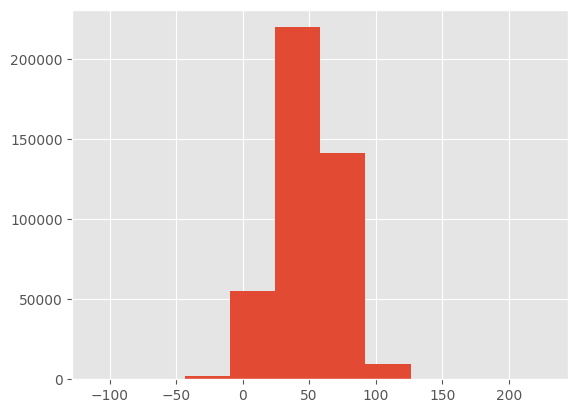

In [34]:
train['calculated_player_performance'].hist()

In [36]:
train[['calculated_player_performance', 'f1', 'f2', 'f3']].describe()

,calculated_player_performance,f1,f2,f3
count,427984.000000,427984.000000,427984.000000,427984.000000
mean,49.330796,0.200415,0.483173,0.514130
std,22.320705,0.105837,0.244079,0.082497
min,-111.160000,0.000000,0.000000,0.025222
25%,33.950000,0.126134,0.306988,0.462111
50%,49.390000,0.194691,0.466420,0.505454
75%,65.100000,0.267318,0.639247,0.555198
max,227.950000,1.209217,3.627652,4.508792
